Namespace(Diters=5, DitersAlt=100, batch_size=16, channelInds=[0, 2], clamp_lower=-0.01, clamp_upper=0.01, dataProvider='DataProvider3D', decDRatio=1e-05, encDRatio=0.001, gpu_ids=[0], imdir='/root/data/release_4_1_17/results_v2/aligned_hdf5', imsize=3, latentDistribution='gaussian', lrDec=0.0005, lrDecD=0.0005, lrEnc=0.0005, lrEncD=0.0005, model_name='aaegan3D', myseed=0, nClasses=0, nRef=0, nch=2, ndat=5770, nepochs=250, nepochs_pt2=500, nlatentdim=16, noise=0.01, optimizer='adam', saveProgressIter=1, saveStateIter=1, save_dir='./test_aaegan/aaegan3D//ref_model', save_parent='./test_aaegan/aaegan3D/', train_module='aaegan_trainv2')
Epoch: 11.0


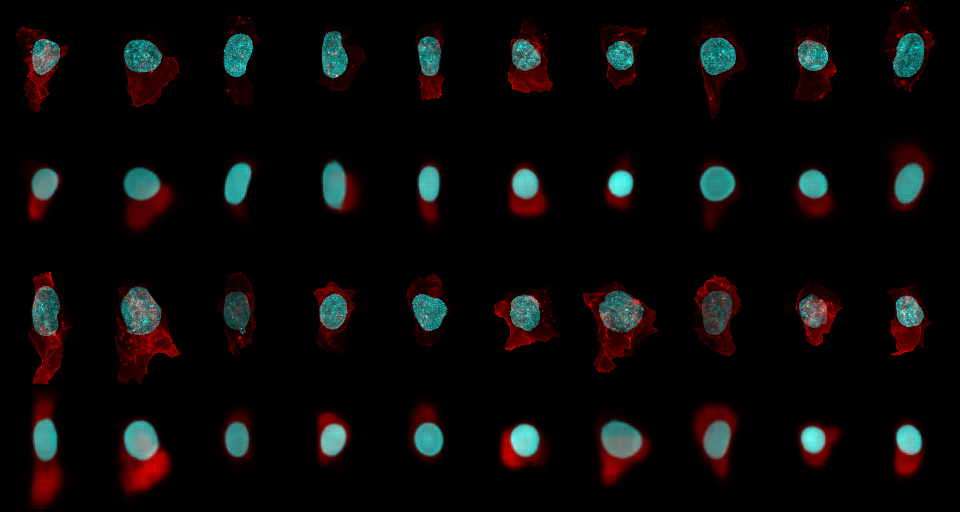

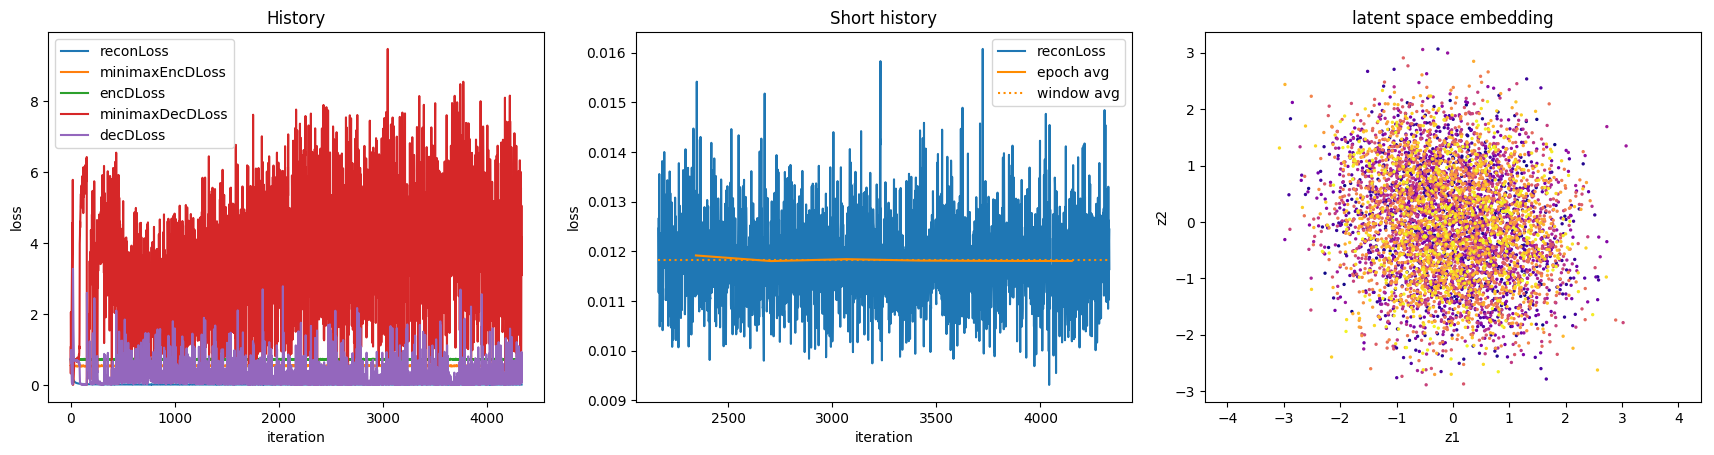

Namespace(Diters=5, DitersAlt=20, batch_size=32, channelInds=[0, 2], clamp_lower=-0.01, clamp_upper=0.01, dataProvider='DataProvider', decDRatio=1e-05, encDRatio=0.001, gpu_ids=[1], imdir='/root/data/release_4_1_17/results_v2/aligned/2D', imsize=128, latentDistribution='gaussian', lrDec=0.0001, lrDecD=0.0001, lrEnc=0.0001, lrEncD=0.0001, model_name='waaegan_v2', myseed=0, nClasses=0, nRef=0, nch=2, ndat=5770, nepochs=250, nepochs_pt2=250, nlatentdim=16, noise=0, optimizer='adam', saveProgressIter=1, saveStateIter=10, save_dir='./test_waaegan/waaegan_v2//ref_model', save_parent='./test_waaegan/waaegan_v2/', train_module='waaegan_train')
Epoch: 249.0


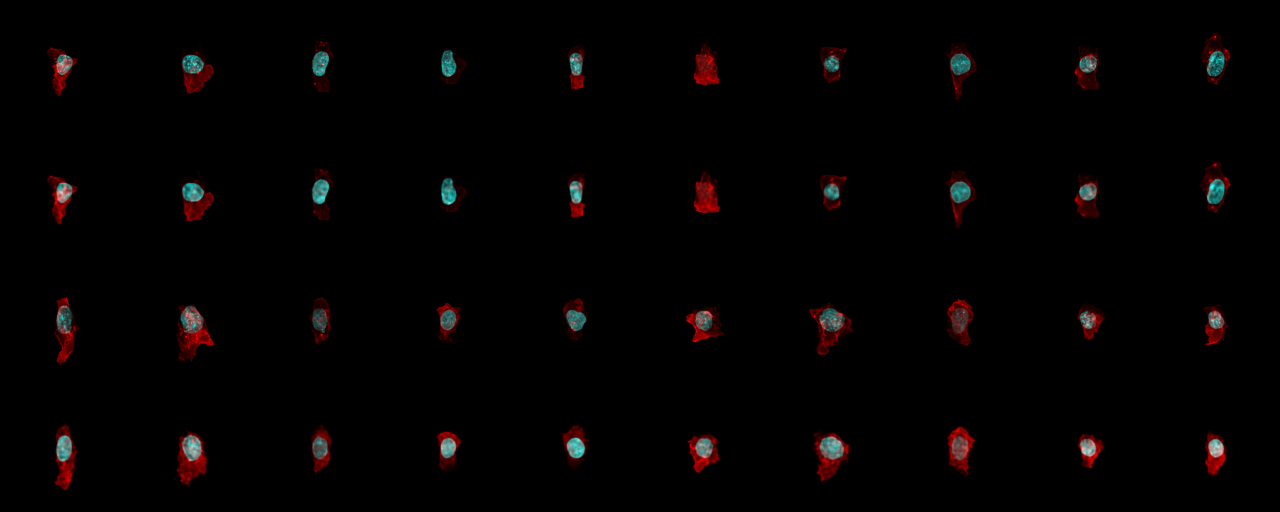

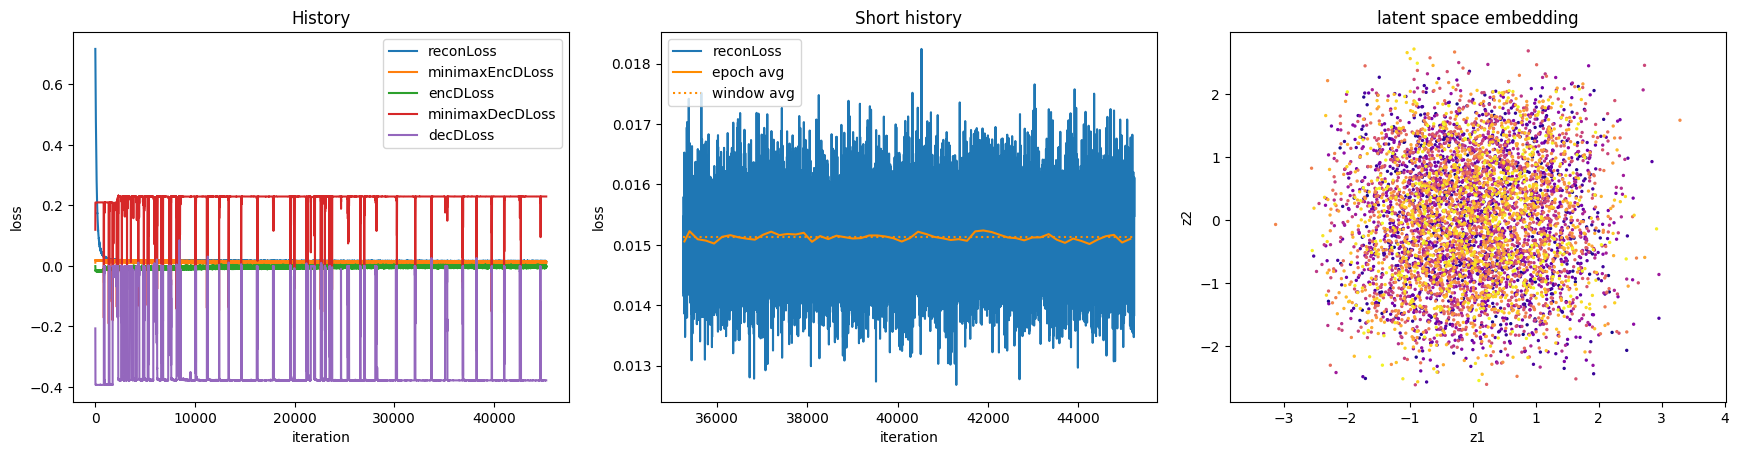

In [142]:
import SimpleLogger as SimpleLogger
import torch
from IPython.core.display import display
import pickle
import os
import PIL.Image
import numpy as np
import scipy.misc as misc

%matplotlib inline


model_dir = './test_aaegan/test/ref_model'
model_dir = './test_aaegan/aaegan3D/ref_model'

# model_dir = './test_waaegan/waaegan_128/ref_model'

# model_dir = './test_aaegan/aaegan_v2_v1/ref_model'
model_dir = './test_aaegan/aaegan_v2_v1/struct_model'

model_dir = './test_waaegan/waaegan_v2/ref_model'

model_dirs = [
              './test_aaegan/aaegan3D/ref_model',
              
              './test_waaegan/waaegan_v2/ref_model'
             ]


def show_dir(model_dir):
    logger_file = '{0}/logger_tmp.pkl'.format(model_dir)
    
    if not os.path.exists(logger_file):
        print('Could not find logger at ' + logger_file)
        return

    logger = pickle.load( open( logger_file, "rb" ) )
    opt = pickle.load( open( '{0}/opt.pkl'.format(model_dir), "rb" ) )

    print(opt)

    epoch = max(logger.log['epoch'])

    print('Epoch: ' + str(epoch))

    im_progress_path = '{0}/progress_{1}.png'.format(model_dir, int(epoch))
    im_progress = misc.imread(im_progress_path)

    im_history_path = '{0}/history.png'.format(model_dir)
    im_history = misc.imread(im_history_path)    

    im_history_short_path = '{0}/history_short.png'.format(model_dir)
    im_history_short = misc.imread(im_history_short_path)    

    im_embedding_path = '{0}/embedding.png'.format(model_dir)
    im_embedding = misc.imread(im_embedding_path)        

    display(PIL.Image.fromarray(im_progress))
    display(PIL.Image.fromarray(np.concatenate((im_history, im_history_short, im_embedding), 1)))
    

for model_dir in model_dirs:
    show_dir(model_dir)

In [ ]:
epoch